The focus of the following programming involves the finding of words associated with a key word which would allow one to make associations regarding caring for patients. Here the key word is telemedicine. Our goal is to determine any other words that are associated with telemedicine which could indicate other issues to take into consideration. Tweets were the source of this data set however patient communications with the physicians could provide the data set to perform a more focused study of patient concerns.

In [1]:
import numpy as np 
import pandas as pd
import nltk

In [2]:
# The first step is to clean and preprocess the data.
# Read data file and drop duplicates.
data = pd.read_csv(r'https://media.githubusercontent.com/media/DavidNNussbaum/Keyword-Associations/master/covid-19_tweets.csv', 
                    engine='python', error_bad_lines=False)   
data = data.drop_duplicates(subset='Tweet') 
data.head()

,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,Country,User - Name,User - ID,User - Description,User - Creation time,User - Language,User - Location,User - Time Zone,User - Statuses,User - Followers,User - Friends,User - Favourites
0,🚨 BREAKING 🚨\n\nWe have therefore made the ass...,1237777021742338050,2020-03-11 19:26:53,50467,55743,0,0,0,NaN,NaN,World Health Organization (WHO),14499829,We are the #UnitedNations’ health agency. We a...,2008-04-23 22:56:27,NaN,"Geneva, Switzerland",NaN,48639,5896245,1715,10510
1,These are 7 simple steps to protect yourself a...,1237721991471382530,2020-03-11 15:48:13,31498,27464,0,0,0,NaN,NaN,World Health Organization (WHO),14499829,We are the #UnitedNations’ health agency. We a...,2008-04-23 22:56:27,NaN,"Geneva, Switzerland",NaN,48639,5896245,1715,10510
2,So here's my personal #coronavirus story....\n...,1237562508258340860,2020-03-11 05:14:29,36442,15453,0,0,0,NaN,NaN,Julie O'Donoghue,355574901,"@stlpublicradio political reporter, former @NO...",2011-08-15 18:32:00,NaN,"St Louis, MO",NaN,60962,10677,1347,15047
3,"RT @sigridbazan: Hasta el momento, estas son l...",1238146877314473980,2020-03-12 19:56:33,0,310,0,0,1,sigridbazan,NaN,Lucía M. Y,993938049091424260,Soy una ingeniera ambiental que se enfrenta di...,2018-05-08 22:37:52,NaN,NaN,NaN,72,7,155,34
4,"RT @Conflits_FR: 🏀 URGENT - Donovan #Mitchell,...",1238146877293498370,2020-03-12 19:56:33,0,398,0,0,1,Conflits_FR,NaN,SON OF WUNNA 24,757696126808158210,🇵🇹🇨🇮 / Young Slime Life @qpr,2016-07-26 00:56:48,NaN,"Atlanta, GA",NaN,58739,258,161,35269


In [ ]:
# Take only the Tweet column from the dataframe.
data = data[['Tweet']]
data.head()

,Tweet
0,🚨 BREAKING 🚨\n\nWe have therefore made the ass...
1,These are 7 simple steps to protect yourself a...
2,So here's my personal #coronavirus story....\n...
3,"RT @sigridbazan: Hasta el momento, estas son l..."
4,"RT @Conflits_FR: 🏀 URGENT - Donovan #Mitchell,..."


In [ ]:
# Remove mentions, links and hasgtags.
import re

new_list = []
content_list = list(data['Tweet'])

for content in content_list:
    sentence = content.split(" ")
    new_string = " "
    for word in sentence:
        words = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",word).split())
        new_string = new_string + " " + words
    sent = ' '.join(words) 
    new_list.append(new_string)
data['Tweet'] = new_list

data.head()

,Tweet
0,BREAKING We have therefore made the assessm...
1,These are 7 simple steps to protect yourself...
2,So here s my personal coronavirus story My s...
3,RT Hasta el momento estas son las universid...
4,RT FR URGENT Donovan Mitchell joueur de l ...


In [ ]:
# Convert text into lower case.
data["Tweet"] = data['Tweet'].str.lower()
data.head()

,Tweet
0,breaking we have therefore made the assessm...
1,these are 7 simple steps to protect yourself...
2,so here s my personal coronavirus story my s...
3,rt hasta el momento estas son las universid...
4,rt fr urgent donovan mitchell joueur de l ...


In [ ]:
# Remove rt from the data.
data["Tweet"] = data['Tweet'].str.replace('rt ','')
data.head()

,Tweet
0,breaking we have therefore made the assessm...
1,these are 7 simple steps to protect yourself...
2,so here s my personal coronavirus story my s...
3,hasta el momento estas son las universidade...
4,fr urgent donovan mitchell joueur de l uta...


In [ ]:
# Remove accented keywords.
data["Tweet"] = data['Tweet'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

In [ ]:
# Remove irrelevant characters other than alphanumeric and space.
data['Tweet']=data['Tweet'].str.replace('[^A-Za-z0-9\s]+', '')
data.head()

,Tweet
0,breaking we have therefore made the assessm...
1,these are 7 simple steps to protect yourself...
2,so here s my personal coronavirus story my s...
3,hasta el momento estas son las universidade...
4,fr urgent donovan mitchell joueur de l uta...


In [ ]:
# Remove numbers from string.
data['Tweet'] = data['Tweet'].str.replace('\d+', '')
data.head()

,Tweet
0,breaking we have therefore made the assessm...
1,these are simple steps to protect yourself ...
2,so here s my personal coronavirus story my s...
3,hasta el momento estas son las universidade...
4,fr urgent donovan mitchell joueur de l uta...


In [ ]:
# Tokenize the data.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

tokenized_data = data['Tweet'].apply(word_tokenize)
tokenized_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0        [breaking, we, have, therefore, made, the, ass...
1        [these, are, simple, steps, to, protect, yours...
2        [so, here, s, my, personal, coronavirus, story...
3        [hasta, el, momento, estas, son, las, universi...
4        [fr, urgent, donovan, mitchell, joueur, de, l,...
                               ...                        
13330    [u, s, sacramento, ca, officials, concede, to,...
13333    [uk, prepares, for, government, imposed, self,...
13338    [broken, down, old, candidates, with, no, mess...
13341    [comunicado, oficial, del, ministerio, de, sal...
13342    [iran, la, nueva, tendencia, de, saludo, para,...
Name: Tweet, Length: 6668, dtype: object

In [ ]:
# Lemmatize the data.
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text)]

data['lemmatized_text'] = data.Tweet.apply(lemmatize_text)
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Tweet,lemmatized_text
0,breaking we have therefore made the assessm...,"[breaking, we, have, therefore, made, the, ass..."
1,these are simple steps to protect yourself ...,"[these, are, simple, step, to, protect, yourse..."
2,so here s my personal coronavirus story my s...,"[so, here, s, my, personal, coronavirus, story..."
3,hasta el momento estas son las universidade...,"[hasta, el, momento, estas, son, la, universid..."
4,fr urgent donovan mitchell joueur de l uta...,"[fr, urgent, donovan, mitchell, joueur, de, l,..."


In [ ]:
# Remove stop words and vectorize the data. Print the vocabulary.
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

extra_stop_words = ['coronavirus', 'http'] 
stop_words = stopwords.words('english') + stopwords.words('french') + stopwords.words('spanish') + extra_stop_words 
tfidf = TfidfVectorizer(encoding='utf-8', stop_words=stop_words)
features = tfidf.fit_transform(data['Tweet'].astype(str))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Look at the shape of the data.

print('There are a total of',len(data), 'Tweets in the dataset')
print('There are a total of',len(tfidf.vocabulary_), 'words in the vocabulary')
print('The index of "telemedicine" is',tfidf.vocabulary_['telemedicine'])

There are a total of 6668 Tweets in the dataset
There are a total of 22917 words in the vocabulary
The index of "telemedicine" is 20283


In [ ]:
# Finding the index of the word by looking it up in the tfidf.vocabulary_:

tfidf.vocabulary_['telemedicine']

20283

In [ ]:
# This is a reverse look up locate a word by its index using a dictionary comprehension.Note that the index number changes ehen the program is rerun.

word_by_index = {tfidf.vocabulary_[key]:key for key in tfidf.vocabulary_.keys() }
print('The word at index 20283 in the vocabulary is',word_by_index[20283])

The word at index 20283 in the vocabulary is telemedicine


In [ ]:
# Determine how often a key word appears.
word = 'telemedicine'
def count_occurrences(word, tweets_cleaned_str):  #to iterate through all tweets.
    idxs = []
    for i, tweet in enumerate(tweets_cleaned_str): # enumerate keeps indexes of telemedicine
        if word in tweet:
            idxs.append(i)
    return idxs 
word_idx = count_occurrences(word, tokenized_data) # Says how many times a particular word appears
print(word, 'appears', len(word_idx), 'time(s)')

telemedicine appears 4 time(s)


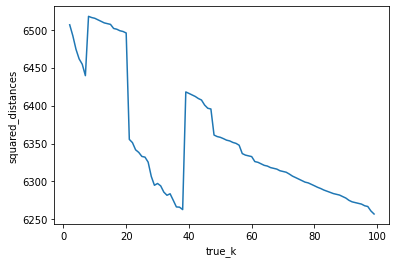

In [ ]:
# Create a graph that has a range of k-means on the X axis and the squared distances on the Y axis.
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.probability import FreqDist 
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
 


# Produce k-means clustering for 2 - 100 clusters. 
true_k = list(range(2, 100)) 
k_attempts = [KMeans(n_clusters=n, init='k-means++', max_iter=100, n_init=1, random_state=42).fit(features) for n in true_k]
squared_distances = [model.inertia_ for model in k_attempts]
 
plt.plot(true_k, squared_distances)
plt.xlabel('true_k')
plt.ylabel('squared_distances')  
plt.show()  

In [ ]:
print('k, Number of Tweets in each cluster')

for k in range(2, 42):
    print(k, [len(tokenized_data[k_attempts[k].labels_ == i]) for i in range(k)])

    
# From the print out below, you can see a very uneven distribution of tweets for many of the choices of k beginning with 36.

k, Number of Tweets in each cluster
2 [1513, 215]
3 [2922, 204, 3073]
4 [2477, 419, 3104, 281]
5 [1103, 406, 3939, 248, 184]
6 [1, 34, 1, 1, 1, 1]
7 [1, 34, 1, 1, 1, 1, 1]
8 [1, 34, 1, 1, 1, 1, 1, 6625]
9 [1, 34, 1, 1, 1, 1, 1, 6623, 2]
10 [1, 34, 1, 1, 1, 1, 1, 6621, 2, 1]
11 [1, 34, 1, 1, 1, 1, 1, 6618, 2, 1, 2]
12 [1, 34, 1, 1, 1, 1, 1, 6617, 2, 1, 2, 2]
13 [1, 34, 1, 1, 1, 1, 1, 6616, 2, 1, 2, 2, 3]
14 [1, 34, 1, 1, 1, 1, 1, 6603, 2, 1, 2, 2, 3, 1]
15 [1, 34, 1, 1, 1, 1, 1, 6602, 2, 1, 2, 2, 3, 1, 1]
16 [1, 34, 1, 1, 1, 1, 1, 6600, 2, 1, 2, 2, 3, 1, 1, 13]
17 [1, 34, 1, 1, 1, 1, 1, 6599, 2, 1, 2, 2, 3, 1, 1, 13, 1]
18 [1, 34, 1, 1, 1, 1, 1, 6597, 2, 1, 2, 2, 3, 1, 1, 13, 1, 2]
19 [110, 38, 95, 45, 209, 134, 93, 248, 194, 187, 240, 70, 185, 98, 464, 2825, 885, 83, 136]
20 [117, 38, 95, 44, 208, 127, 105, 248, 192, 186, 359, 70, 140, 82, 435, 2926, 649, 82, 134, 120]
21 [80, 38, 94, 37, 207, 126, 101, 239, 191, 165, 354, 75, 106, 84, 438, 3086, 469, 82, 126, 77, 187]
22 [99, 38, 92, 

In [ ]:
# We will create a centers_list consisting of the cluster number, the word, and its coefficient.
k = 36

K_model = k_attempts[k-2]

# We will figure out what the cluster_centers_ means
centers_list = []
(nz_rows, nz_cols) = np.nonzero(K_model.cluster_centers_)

for (i, j) in zip(nz_rows, nz_cols):
    cluster = i
    word = word_by_index[j]
    coefficient = K_model.cluster_centers_[i,j]
    print('cluster: {0:0.0f} {1:>30s} coefficient: {2:0.4f}'.format(cluster,word,coefficient))
    centers_list.append([cluster, word, coefficient])

    
# What we see is that the coefficients in the cluster_centers vector is the weight that 
# is placed on each of the words in the tweet to find the center of the cluster in the 5453 dimensional
# space of the model

# for example the center of cluster 0 is whose first word is 'abroad' and last word is 'yet' would be at:

# y_cluster_zero = 0.0161 * x_abroad + 0.0185 * x_abruptly + 0.0111 * x_action + ... + 0.0100 * x_yet

Streaming output truncated to the last 5000 lines.
cluster: 31                            joe coefficient: 0.0019
cluster: 31                           join coefficient: 0.0041
cluster: 31                        joining coefficient: 0.0016
cluster: 31                         jordan coefficient: 0.0017
cluster: 31                        journal coefficient: 0.0016
cluster: 31                    journalists coefficient: 0.0015
cluster: 31                           jury coefficient: 0.0016
cluster: 31                   jyotiraditya coefficient: 0.0020
cluster: 31                         kamera coefficient: 0.0014
cluster: 31                      karnataka coefficient: 0.0020
cluster: 31                         kelley coefficient: 0.0016
cluster: 31                            key coefficient: 0.0012
cluster: 31                       kfashion coefficient: 0.0035
cluster: 31                            kid coefficient: 0.0021
cluster: 31                           king coefficient: 0.0036
clus

In [ ]:
# We will create a dataframe based on the cluster centers.
cols = ['cluster','word','coefficient']

df_centers = pd.DataFrame(centers_list, columns=cols)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


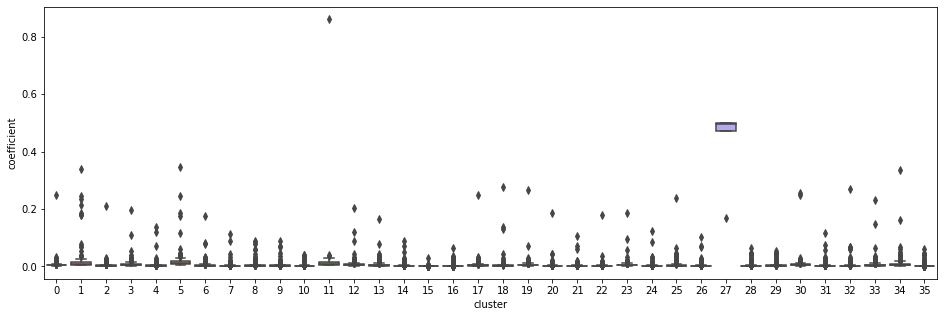

In [ ]:
# We will look at the centers coefficients to see if there is a pattern across clusters. In this case there is none.

import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)


sns.boxplot(x='cluster',y='coefficient',data=df_centers, ax=ax)

In [ ]:
search_word = 'telemedicine'
for K in range(k):
    tweets = data['Tweet'][k_attempts[k-2].labels_== K]
    for i in range(len(tweets)):
        tweet = tweets.iloc[i].strip()
        tweet_words = [w.strip() for w in tweet.split()]
        if search_word in tweet_words:
            print('found "',search_word, '" in cluster', K, 'tweet number', i, ': \n"', tweet, '"\n\n')


found " telemedicine " in cluster 15 tweet number 180 : 
" watch vice president pence on american insurance companies committing to waive copays cover coronavirus treatment costs ensure no surprise billing and encourage telemedicine "


found " telemedicine " in cluster 15 tweet number 492 : 
" msm blackout  health insurance companies agreed to waive co pays for coronavirus testing to extend coverage for coronavirus wuhanvirus treatment and to cover telemedicine and no surprise billing on coronavirus testing thanks "


found " telemedicine " in cluster 15 tweet number 1099 : 
" as a result of the coronavirus we are going to expand telework telemedicine  tele education in the process we re going to find out that the digital divide is real because for too many folks in rural  urban america broadband is still out of reach we have to fix this "


found " telemedicine " in cluster 22 tweet number 194 : 
" tn president donald trump secures no cost virus testing for americans clarksville clar

We can thus see that telemedicine is connected with cost which is a factor to be taken into account.